# Reference :
https://www.kaggle.com/code/mahmoudlimam/basic-nlp-text-classification

In [1]:

import numpy as np
import pandas as pd 
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt 
from tensorflow import keras 
from keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
import string
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, LSTM, Embedding,Dropout,SpatialDropout1D,Conv1D,MaxPooling1D,GRU,BatchNormalization
from tensorflow.keras.layers import Input,Bidirectional,GlobalAveragePooling1D,GlobalMaxPooling1D,concatenate,LeakyReLU
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from keras.preprocessing import sequence
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("../input/amazon-fine-food-reviews/Reviews.csv")

In [3]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
data.shape

(568454, 10)

In [5]:
data["Summary"].nunique()


295742

In [6]:
data.columns = data.columns.str.lower()

In [7]:
data.head()

,id,productid,userid,profilename,helpfulnessnumerator,helpfulnessdenominator,score,time,summary,text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [8]:
data.columns = data.columns.str.strip().str.replace(' ', '_')

In [9]:
data.head()

,id,productid,userid,profilename,helpfulnessnumerator,helpfulnessdenominator,score,time,summary,text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [10]:
data['productid'].nunique()

74258

In [11]:
data.isna().sum()

id                         0
productid                  0
userid                     0
profilename               16
helpfulnessnumerator       0
helpfulnessdenominator     0
score                      0
time                       0
summary                   27
text                       0
dtype: int64

In [12]:
import sqlite3 
database = sqlite3.connect("../input/amazon-fine-food-reviews/database.sqlite")

In [13]:
database = pd.read_sql_query("""SELECT * FROM Reviews """,database)
database.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [14]:
database.shape

(568454, 10)

In [15]:
Y=database["Score"]

In [16]:
Y.unique()

array([5, 1, 4, 2, 3])

In [17]:
new_data=data.loc[0:5000,:]

In [18]:
new_data.shape

(5001, 10)

In [19]:
database.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [20]:
import string
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language="english")
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
punctuation = string.punctuation

In [21]:
def transform(c):
    return (str(c["profilename"]) + " " + str(c["summary"]) + " " + str(c["text"]))


In [22]:
new_data = new_data.apply(transform, axis=1)


In [23]:
new_data.head()

0    delmartian Good Quality Dog Food I have bought...
1    dll pa Not as Advertised Product arrived label...
2    Natalia Corres "Natalia Corres" "Delight" says...
3    Karl Cough Medicine If you are looking for the...
4    Michael D. Bigham "M. Wassir" Great taffy Grea...
dtype: object

In [24]:
def process(s):
    for p in punctuation:
        s = s.replace(p, '')
    s = s.lower()
    s = word_tokenize(s)
    s = [w for w in s if not w in stop_words] #optional
    s = [stemmer.stem(word) for word in s]
    return s

In [25]:
N=new_data.shape[0]

In [26]:
num_sampl = N

from tqdm import tqdm

for i in tqdm(range(num_sampl)):
    new_data[i] = process(new_data[i])

100%|██████████| 5001/5001 [00:06<00:00, 734.76it/s]


In [27]:
for i in tqdm(range(N)):
    new_data[i] = " ".join(new_data[i])

100%|██████████| 5001/5001 [00:00<00:00, 78008.82it/s]


In [28]:
new_data.head()

0    delmartian good qualiti dog food bought sever ...
1    dll pa advertis product arriv label jumbo salt...
2    natalia corr natalia corr delight say confect ...
3    karl cough medicin look secret ingredi robitus...
4    michael bigham wassir great taffi great taffi ...
dtype: object

In [29]:
new_data.shape

(5001,)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = CountVectorizer()

In [31]:
bow_data = vectorizer.fit_transform(new_data)

In [32]:
vectorizer = CountVectorizer(max_features=100000)
bow_data = vectorizer.fit_transform(new_data).toarray()
features = vectorizer.get_feature_names_out()
bow_data = pd.DataFrame(bow_data, columns=features)

In [33]:
bow_data

,00,002,01,0174organ,0212,02122012br,026,028,029,02ounc,...,ztardust,zuccarino,zucchini,zucchinibr,zugg,zuke,zulli,zupa,zuppa,îts
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [35]:
Y=Y[:5001]

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import  MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

In [37]:
xtrain, xtest, ytrain, ytest = train_test_split(bow_data, Y, test_size=0.2)

In [38]:
models = [
    { "estimater": KNeighborsClassifier(),
      "params": {
          "n_neighbors": [25,30,35,45],
          "weights": ['uniform','distance'],
          "leaf_size": [25,30,35]
        }
    },
    { "estimater": DecisionTreeClassifier(),
      "params": {
          "criterion": ['gini','entropy'],
          "splitter": ['best','random'],
          "max_depth": [None,90,95,100],
          "max_features": [None, "auto","sqrt","log2"],
          "random_state": [42]
      }
    },
    { "estimater": MultinomialNB(),
      "params": {
          "fit_prior": [True, False]    
      }
    },
    { "estimater": LinearSVC(),
      "params": {
          "loss": ['hinge','squared_hinge'],
          "multi_class": ['ovr', 'crammer_singer'],
          "fit_intercept": [True, False],
          "random_state": [42],
          "max_iter": [50, 100, 200]
      }
    },
    
    { "estimater": RandomForestClassifier(),
      "params": {
      "criterion": ['gini','entropy'],
      "bootstrap": [True, False],
      "max_depth": [85,90,95,100],
      "max_features": ['sqrt','log2'],
      "n_estimators": [60, 80, 90],
      "random_state": [42]
      }
    },
    { "estimater": SGDClassifier(),
      "params": {
          "loss": ['hinge','log','perceptron'], 
          "penalty": ['l2', 'l1'], 
          "alpha": [0.0001, 0.0003, 0.0010],
          "early_stopping": [True],
          "max_iter": [1000, 1500],
          "random_state": [42]
      }
    }
]

column_names = ["KNeighbors", "DecisionTree", "MultiNB", "SVC", "RFC", "SGDClassifier"]
entries = []

highest_acc = 0
best_model = None


In [39]:
for model in models:
    print(model["estimater"])

    clf = model["estimater"]
    grid_search = GridSearchCV(estimator = clf, param_grid = model["params"], 
                            cv = 3, n_jobs = 1)
    grid_search.fit(xtrain, ytrain);

    predicted = grid_search.predict(xtest)
    acc = accuracy_score(predicted, ytest)
    print(acc)
    entries.append(acc)

    print(grid_search.best_params_)

    if acc > highest_acc:
        highest_acc = acc
        best_model = grid_search

KNeighborsClassifier()
0.6173826173826173
{'leaf_size': 25, 'n_neighbors': 25, 'weights': 'distance'}
DecisionTreeClassifier()
0.5944055944055944
{'criterion': 'gini', 'max_depth': 95, 'max_features': 'log2', 'random_state': 42, 'splitter': 'random'}
MultinomialNB()
0.6413586413586414
{'fit_prior': True}
LinearSVC()
0.6513486513486514
{'fit_intercept': True, 'loss': 'squared_hinge', 'max_iter': 100, 'multi_class': 'ovr', 'random_state': 42}
RandomForestClassifier()
0.6363636363636364
{'bootstrap': False, 'criterion': 'gini', 'max_depth': 100, 'max_features': 'sqrt', 'n_estimators': 90, 'random_state': 42}
SGDClassifier()
0.6733266733266733
{'alpha': 0.001, 'early_stopping': True, 'loss': 'log', 'max_iter': 1000, 'penalty': 'l2', 'random_state': 42}


       Estimater  Accuracy
0     KNeighbors  0.617383
1   DecisionTree  0.594406
2        MultiNB  0.641359
3            SVC  0.651349
4            RFC  0.636364
5  SGDClassifier  0.673327


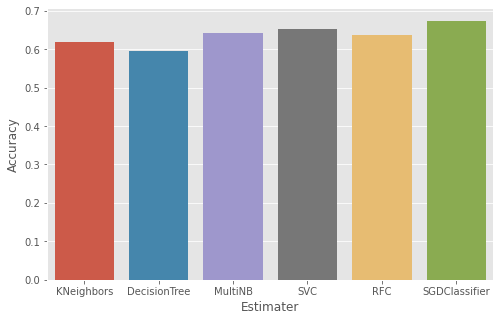

In [40]:
column_name = ["KNeighbors", "DecisionTree", "MultiNB", "SVC", "RFC", "SGDClassifier"]
plt.style.use('ggplot')
plt.figure(figsize=(8, 5))

df = pd.DataFrame({"Estimater": column_name, 
                   "Accuracy": entries
                  })

sns.barplot(x='Estimater', y='Accuracy', data=df)

print(df)

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

def evaluate_preds(y_true, y_preds):
    

    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds, average='micro')
    recall = recall_score(y_true, y_preds, average='micro')
    f1 = f1_score(y_true, y_preds, average='micro')
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [42]:
predicted = best_model.predict(xtest)
evaluate_preds(ytest, predicted)

Acc: 67.33%
Precision: 0.67
Recall: 0.67
F1 score: 0.67


{'accuracy': 0.67, 'precision': 0.67, 'recall': 0.67, 'f1': 0.67}